In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##   Section 1 - Load and Visualise the Data

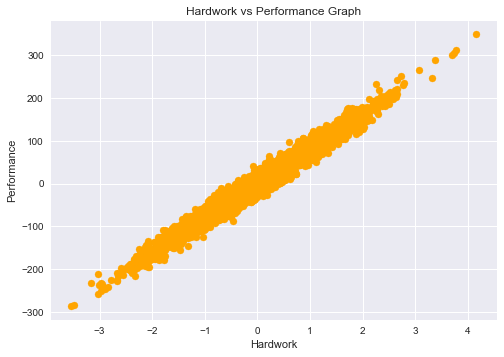

In [2]:
# Load
X = pd.read_csv('./Training Data/Linear_X_Train.csv')
y = pd.read_csv('./Training Data/Linear_Y_Train.csv')

# Convert X,Y to Numpy arrays
X = X.values
y = y.values

# Normalisation
u = X.mean()
std = X.std()
X = (X-u)/std


# Visualise
plt.style.use('seaborn')
plt.scatter(X,y,color='orange')
plt.title("Hardwork vs Performance Graph")
plt.xlabel("Hardwork")
plt.ylabel("Performance")
plt.show()

## Section 2 - Linear Regression

In [3]:
def hypothesis(x,theta):
    y_ = theta[0] + theta[1]*x
    return y_

def gradient(X,Y,theta):
    m = X.shape[0]
    grad = np.zeros((2,))
    for i in range(m):
        x = X[i]
        y_ = hypothesis(x,theta)
        y = Y[i]
        grad[0] += (y_ - y)
        grad[1] += (y_ - y)*x
    return grad/m

def error(X,Y,theta):
    m = X.shape[0]
    total_error = 0.0
    for i in range(m):
        y_ = hypothesis(X[i],theta)
        total_error += (y_ - Y[i])**2
        
    return (total_error/m)
    

def gradientDescent(X,Y,max_steps=100,learning_rate =0.1):
    
    theta = np.zeros((2,))
    error_list = []
    theta_list = []
    
   
    for i in range(max_steps):
        
        # Compute grad
        grad = gradient(X,Y,theta)
        e = error(X,Y,theta)[0]
        
        
        #Update theta
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        # Storing the theta values during updates
        theta_list.append((theta[0],theta[1]))
        error_list.append(e)
        
    return theta,error_list,theta_list

In [4]:
theta,error_list,theta_list = gradientDescent(X,y)

In [5]:
theta

array([ 0.6838508 , 79.90361453])

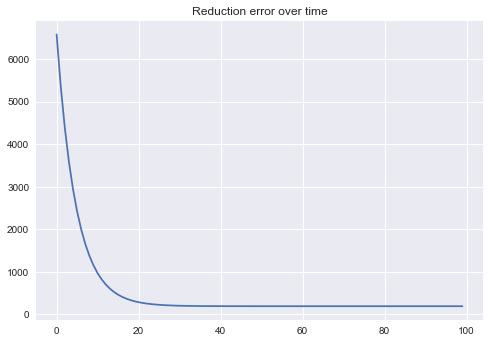

In [6]:
plt.plot(error_list)
plt.title("Reduction error over time")
plt.show()

## Section - 3 Predictions and Best Line

In [7]:
y_ = hypothesis(X,theta)
print(y_)

[[-19.5733619 ]
 [-43.69571729]
 [ 86.4848761 ]
 ...
 [-20.85044708]
 [138.70197319]
 [-35.87897262]]


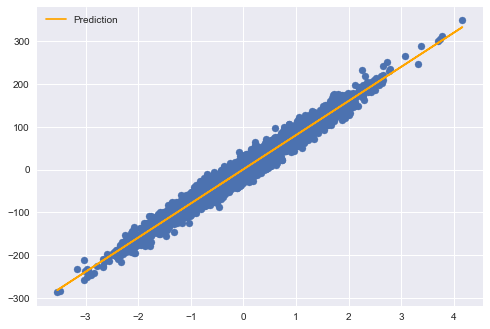

In [8]:
# Training + Predictions
plt.scatter(X,y)
plt.plot(X,y_,color='orange',label="Prediction")
plt.legend()
plt.show()

In [9]:
# Load the test data
X_test = pd.read_csv('./Test Cases/Linear_X_Test.csv').values
y_test = hypothesis(X_test,theta)

In [10]:
df = pd.DataFrame(data=y_test,columns=["y"])

In [11]:
df.to_csv('y_prediction.csv',index=False)

## Section - 4 Computing Score

In [12]:
def r2_score(Y,Y_):
    # Instead of Loop, np.sum is recommended as it is fast
    num = np.sum((Y-Y_)**2)
    denom = np.sum((Y- Y.mean())**2)
    score = (1- num/denom)
    return score*100

In [13]:
r2_score(y,y_)

97.09612226971643